In [83]:
%matplotlib notebook
%matplotlib inline

In [84]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,128472.019282,1265.740459,432875.589083
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,124055.861168,1344.200217,436425.378933
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,133518.897062,1384.146517,507108.808651
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,114537.0,1223.0,467700.0,Oakland,136748.636321,1460.170794,558398.920937
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,126646.0,1498.0,538500.0,Oakland,143207.147803,1693.889325,608918.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,54364.200269,829.778170,98140.669876
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,39926.0,622.0,89700.0,Kent,50892.198969,792.840449,114337.280155
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,40895.0,648.0,78800.0,Kent,50494.800900,800.113241,97297.721261


In [ ]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
# for i in census_df.index:
#     census_df.at[i,"% Black Population"]

In [ ]:
# Create summary statistics table with stats for each county (mean / median of each column)

# Income in Each County, by Zipcode **Jonathan**

In [ ]:
# Create scatter plot(s) for Income in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Home Values in Each County, by Zipcode **Tamica**

In [ ]:
# Create scatter plot(s) for Home Values in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [86]:
# create dataframes for each county
Kent_df = census_df.loc[census_df['County'] == 'Kent']
Oakland_df = census_df.loc[census_df['County'] == 'Oakland']
Saginaw_df = census_df.loc[census_df['County'] == 'Saginaw']

#Oakland_df["Zipcode"] = Oakland_df["Zipcode"].astype("object")
#Kent_df["Zipcode"] = Kent_df["Zipcode"].astype("object")
#Saginaw_df["Zipcode"] = Saginaw_df["Zipcode"].astype("object")

# Saginaw County Median Rent vs Year by Zipcode

(2011.0, 2020.0)

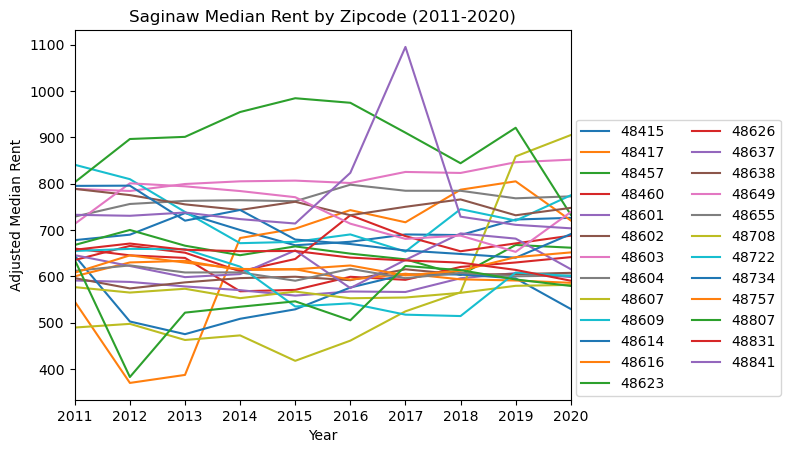

In [87]:
Saginaw_df = Saginaw_df.sort_values('Year', ascending=True)
Saginaw_df.set_index('Year', inplace=True)
Saginaw_df.groupby('Zipcode')['Adjusted Median Rent'].plot()
plt.legend(loc=(1.01,0.01), ncol= 2)
plt.xlabel('Year')
plt.ylabel('Adjusted Median Rent')
plt.title('Saginaw Median Rent by Zipcode (2011-2020)')
plt.xlim(2011, 2020)

In [ ]:
# calculate and add linear regression to evaluate

# Oakland County Median Rent vs Year by Zipcode

(2011.0, 2020.0)

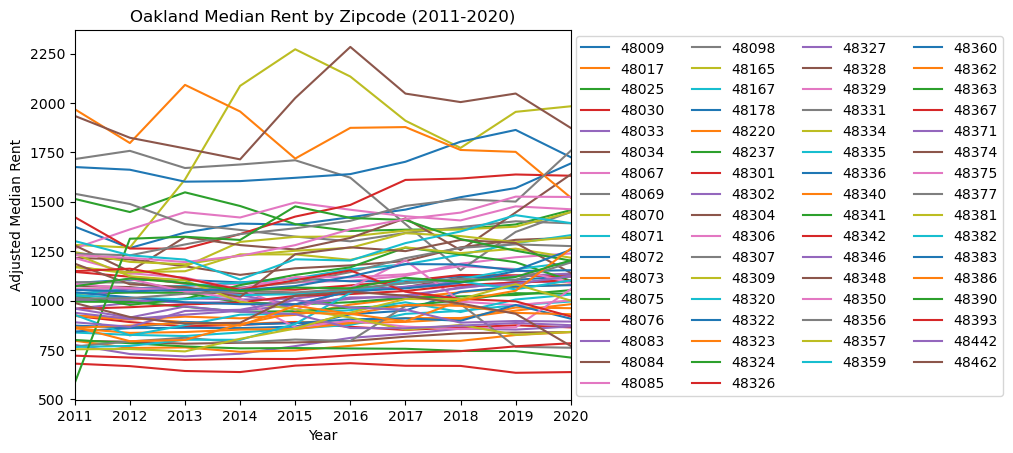

In [88]:
Oakland_df = Oakland_df.sort_values('Year', ascending=True)
Oakland_df.set_index('Year', inplace=True)
Oakland_df.groupby('Zipcode')['Adjusted Median Rent'].plot()
plt.legend(loc=(1.01,0.01), ncol= 4)
plt.xlabel('Year')
plt.ylabel('Adjusted Median Rent')
plt.title('Oakland Median Rent by Zipcode (2011-2020)')
plt.xlim(2011,2020)

In [ ]:
# calculate linear regression to evaluate

# Kent County Median Rent vs Year by Zipcode

(2011.0, 2020.0)

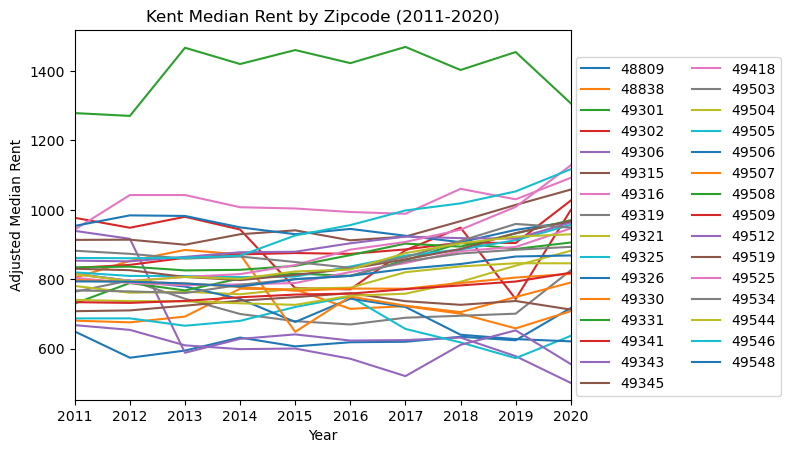

In [89]:
Kent_df = Kent_df.sort_values('Year', ascending=True)
Kent_df.set_index('Year', inplace=True)
Kent_df.groupby('Zipcode')['Adjusted Median Rent'].plot()
plt.legend(loc=(1.01,0.01), ncol= 2)
plt.xlabel('Year')
plt.ylabel('Adjusted Median Rent')
plt.title('Kent Median Rent by Zipcode (2011-2020)')
plt.xlim(2011,2020)

In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graphs


# Demographic Composition in Each County, by Zipcode **Rhi**

In [ ]:
# Create scatter plot(s) for total population in each county 
# also need to do graphs for demographic composition, employment rate, poverty rate
# Need to create more filters by year and by zip code within counties


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Combination Visualizations

# GIF Maps

In [ ]:
# Relocate needed module and import it (install as well)

In [ ]:
# Determine what specific visualizations to convert to map GIFs

In [ ]:
# Create maps by county, showing individual points per zipcode (heat map)

In [ ]:
# Export maps?